In [1]:
from ziziv1 import get_model, evaluate, config, make_grid

In [16]:
import os
import torch
from diffusers import DDPMPipeline
torch.manual_seed(1984)

device = "mps"

In [17]:
pipeline_cpu = DDPMPipeline.from_pretrained("trained-models/zizi-test-128")
pipeline_mps = DDPMPipeline.from_pretrained("trained-models/zizi-test-128").to(device)
pipeline_compiled = DDPMPipeline.from_pretrained("trained-models/zizi-test-128").to(device)
pipeline_compiled.unet = torch.compile(pipeline_compiled.unet, backend="aot_eager")

In [9]:
%time pipeline_cpu(batch_size=4, num_inference_steps=20)

  0%|          | 0/20 [00:00<?, ?it/s]

CPU times: user 2min 32s, sys: 21.2 s, total: 2min 53s
Wall time: 42.8 s


ImagePipelineOutput(images=[<PIL.Image.Image image mode=RGB size=128x128 at 0x2A9D1A9A0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x2A9D1A5E0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x2A9D1A940>, <PIL.Image.Image image mode=RGB size=128x128 at 0x2A9D1A7F0>])

In [15]:
%time pipeline_mps(batch_size=4, num_inference_steps=20)

  0%|          | 0/20 [00:00<?, ?it/s]

CPU times: user 1.6 s, sys: 358 ms, total: 1.96 s
Wall time: 3.84 s


ImagePipelineOutput(images=[<PIL.Image.Image image mode=RGB size=128x128 at 0x28C01F490>, <PIL.Image.Image image mode=RGB size=128x128 at 0x28BDD7EB0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x28C050250>, <PIL.Image.Image image mode=RGB size=128x128 at 0x289E5AC70>])

In [14]:
%time pipeline_compiled(batch_size=4, num_inference_steps=20)

  0%|          | 0/20 [00:00<?, ?it/s]

CPU times: user 1.78 s, sys: 693 ms, total: 2.47 s
Wall time: 3.99 s


ImagePipelineOutput(images=[<PIL.Image.Image image mode=RGB size=128x128 at 0x2FDB9A310>, <PIL.Image.Image image mode=RGB size=128x128 at 0x28C050850>, <PIL.Image.Image image mode=RGB size=128x128 at 0x28C050F70>, <PIL.Image.Image image mode=RGB size=128x128 at 0x28C050040>])

  0%|          | 0/20 [00:00<?, ?it/s]

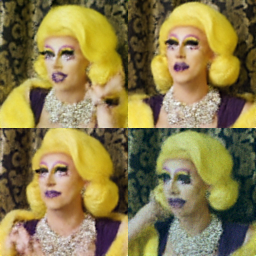

In [7]:
result = pipeline(batch_size=4, num_inference_steps=20)
make_grid(result.images, 2, 2)

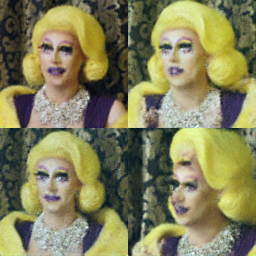

In [42]:
make_grid(result.images, 2, 2)